In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
%matplotlib inline

Загрузите прилагающийся датасет.
---

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data for ML projects/Mall_Customers.csv', index_col='CustomerID')
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.
---

In [ ]:
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.
---

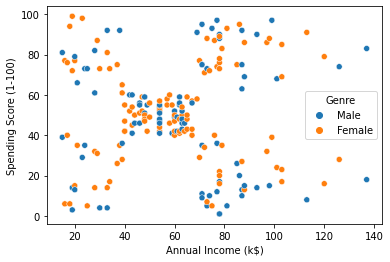

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
None

Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.
---

In [ ]:
df.Genre = df.Genre.apply(lambda i: 0 if i=='Male' else 1)
df.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6


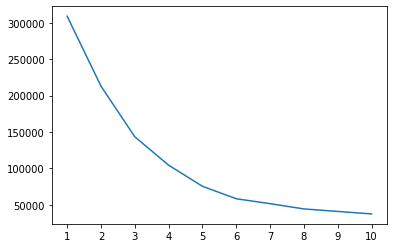

In [ ]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(df)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
None

Обучить модель К-средних и предсказать кластер для каждого значения из датасета.
---

In [ ]:
y_kmeans = KMeans(n_clusters=5,random_state=42)
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [ ]:
print(kmeans.cluster_centers_)

[[ 0.60869565 45.2173913  26.30434783 20.91304348]
 [ 0.58227848 43.08860759 55.29113924 49.56962025]
 [ 0.47222222 40.66666667 87.75       17.58333333]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]
 [ 0.60869565 25.52173913 26.30434783 78.56521739]]


Построить графическую интерпретацию из пункта 3, с центрами кластеров.
---

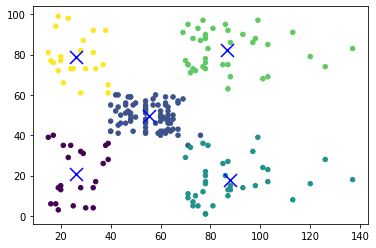

In [ ]:
colors = np.random.rand(200)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 2],
    centers[:, 3],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
None

Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.
---

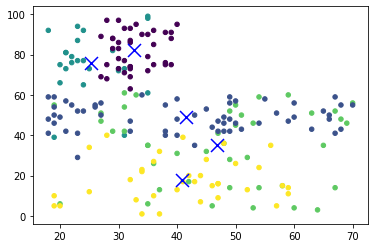

In [ ]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=y_kmeans, s=20, cmap='viridis')
plt.scatter(
    centers[:, 2],
    centers[:, 4],
    marker="x",
    s=169,
    linewidths=3,
    color="b"
)
None

Оцените модель с помощью метрик.
---

In [ ]:
silhouette_score__ = silhouette_score(df, y_kmeans)
calinski_harabasz_score__ = calinski_harabasz_score(df, y_kmeans)
print(f'silhouette_score is {round(silhouette_score__,2)}')
print(f'calinski_harabasz_score is {round(calinski_harabasz_score__, 2)}')

silhouette_score is 0.44
calinski_harabasz_score is 150.95


Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.
---

In [ ]:
s_s = []
c_h_s = []
for i in range(2,11):
  k_means = KMeans(n_clusters=i,random_state=42)
  k_means.fit(df)
  y_kmeans = k_means.predict(df)
  silhouette_score__ = silhouette_score(df, y_kmeans)
  calinski_harabasz_score__ = calinski_harabasz_score(df, y_kmeans)
  s_s.append(silhouette_score__)
  c_h_s.append(calinski_harabasz_score__)
  print(f'scores for {i} clusters is')
  print(f'silhouette_score is {round(silhouette_score__,2)}')
  print(f'calinski_harabasz_score is {round(calinski_harabasz_score__, 2)}')
  print('-'*35)

scores for 2 clusters is
silhouette_score is 0.29
calinski_harabasz_score is 89.26
-----------------------------------
scores for 3 clusters is
silhouette_score is 0.38
calinski_harabasz_score is 113.67
-----------------------------------
scores for 4 clusters is
silhouette_score is 0.41
calinski_harabasz_score is 127.92
-----------------------------------
scores for 5 clusters is
silhouette_score is 0.44
calinski_harabasz_score is 150.87
-----------------------------------
scores for 6 clusters is
silhouette_score is 0.45
calinski_harabasz_score is 166.58
-----------------------------------
scores for 7 clusters is
silhouette_score is 0.43
calinski_harabasz_score is 160.47
-----------------------------------
scores for 8 clusters is
silhouette_score is 0.43
calinski_harabasz_score is 163.55
-----------------------------------
scores for 9 clusters is
silhouette_score is 0.41
calinski_harabasz_score is 156.23
-----------------------------------
scores for 10 clusters is
silhouette_scor

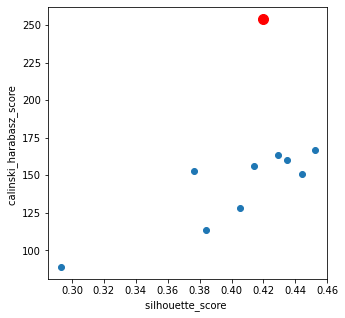

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=s_s, y=c_h_s)
ax.set_xlabel('silhouette_score ')
ax.set_ylabel('calinski_harabasz_score ')
ax.scatter(x=0.42, y=253.85, c='r', s=100)
None

Пять кластеров на самом деле являются оптимальными в данной задаче
---